In [ ]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio
land_mask = xr.open_dataset('/cluster/shared/noresm/inputdata/share/domains/domain.lnd.fv1.9x2.5_tnx1v4.170609.nc', decode_times=False)
mask = np.array(land_mask['mask'])

: 

##making GIF images of the time evolution maps from SSP534

/tmp/ipykernel_211335/2648601858.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})


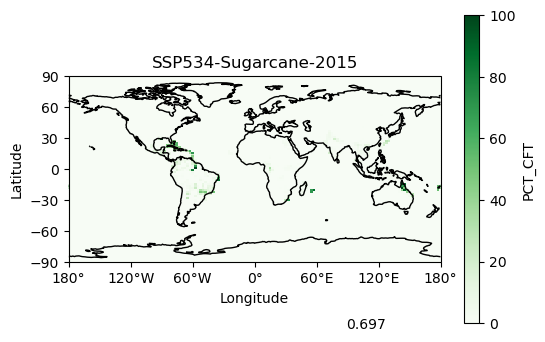

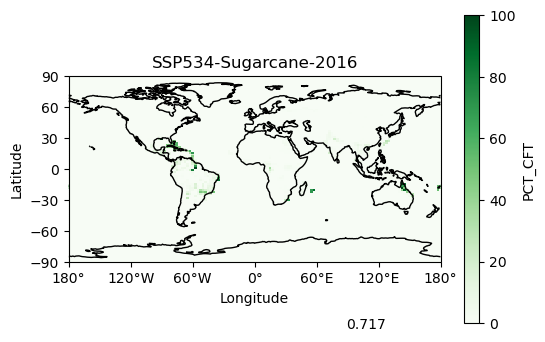

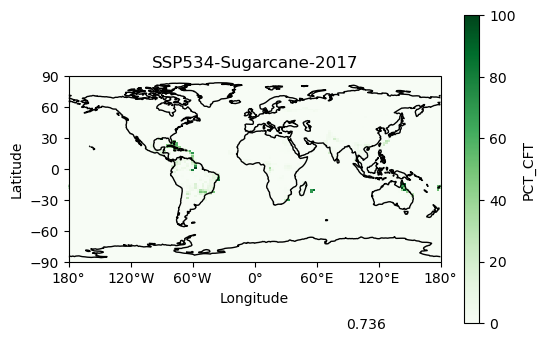

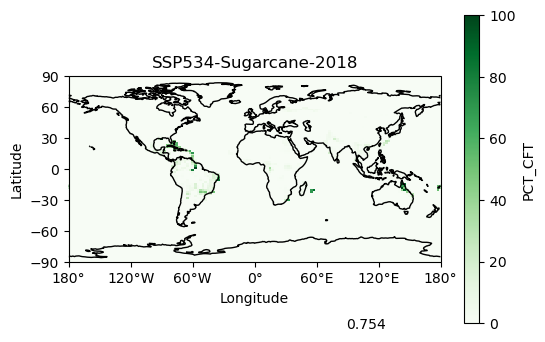

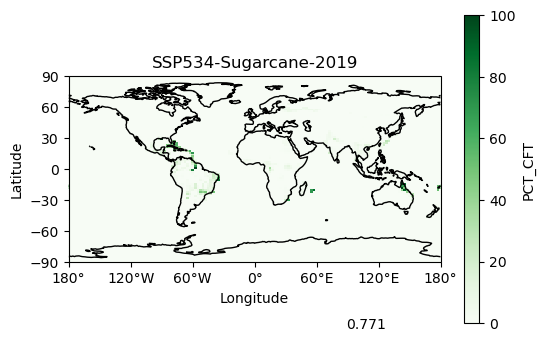

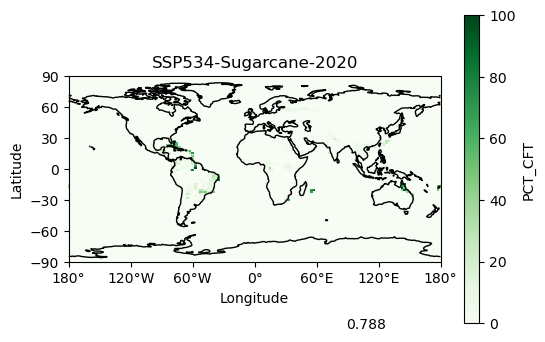

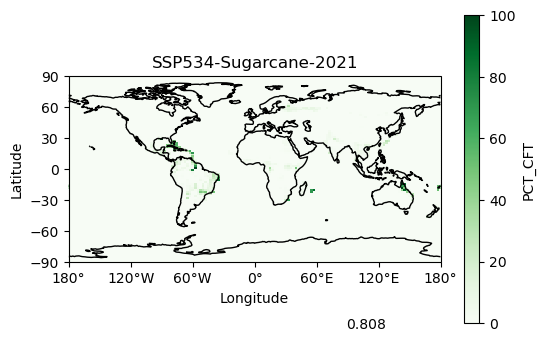

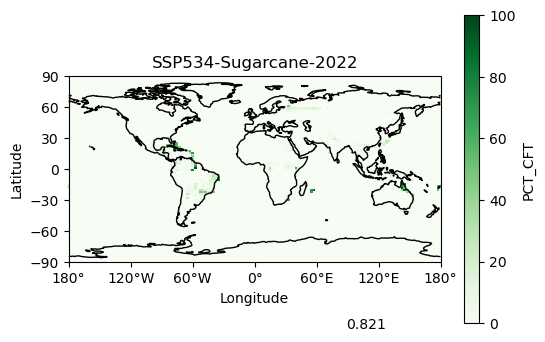

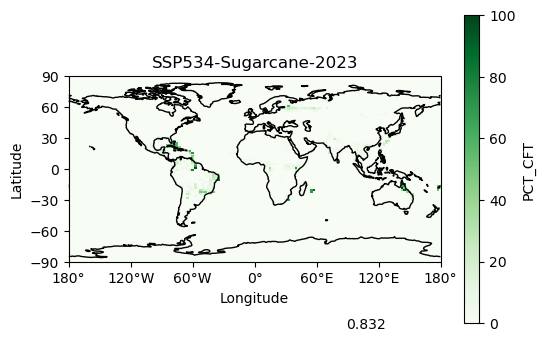

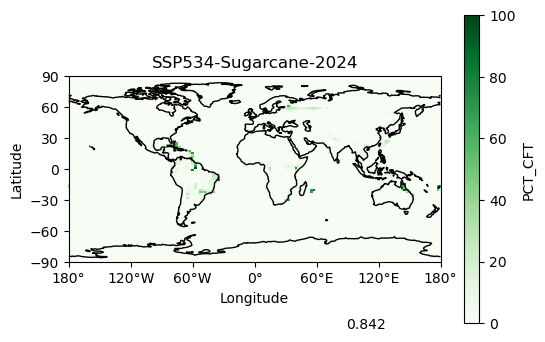

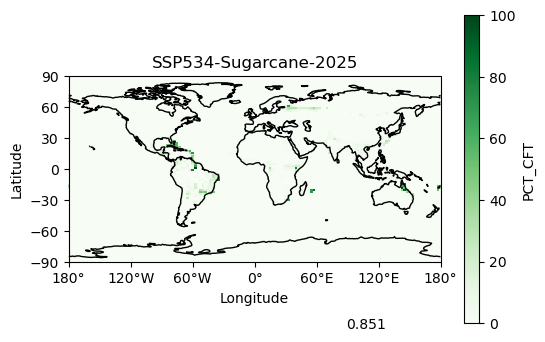

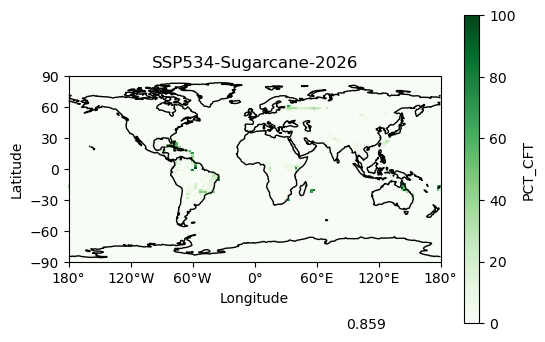

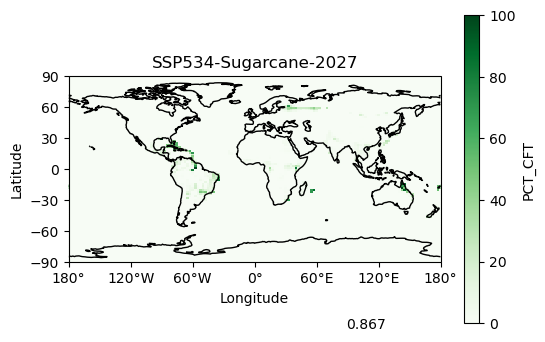

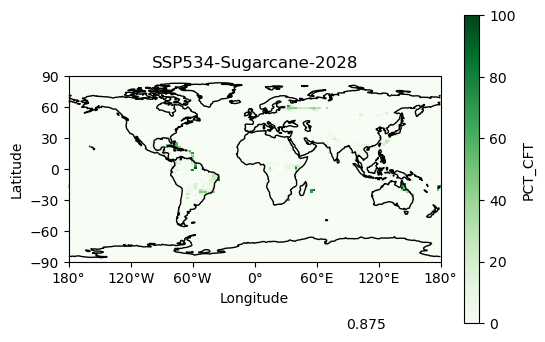

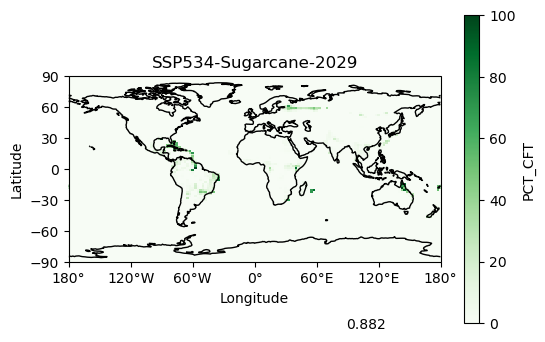

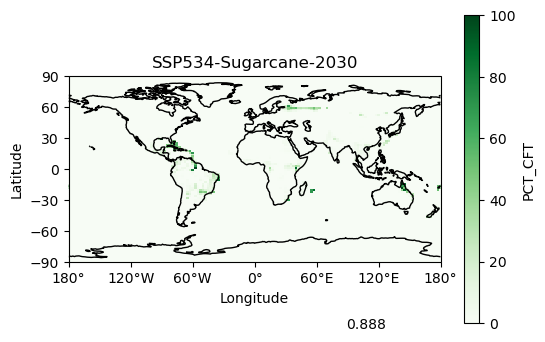

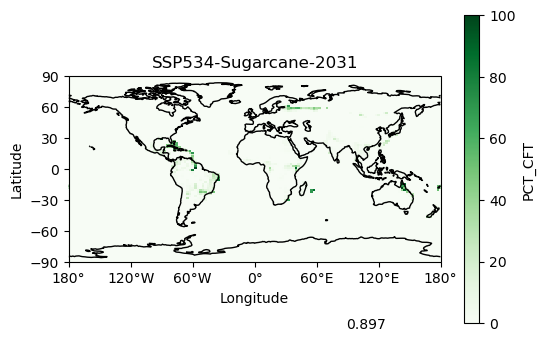

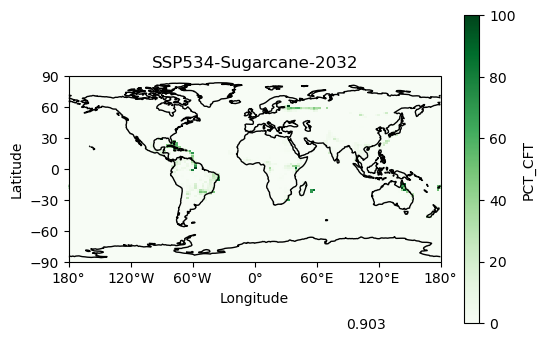

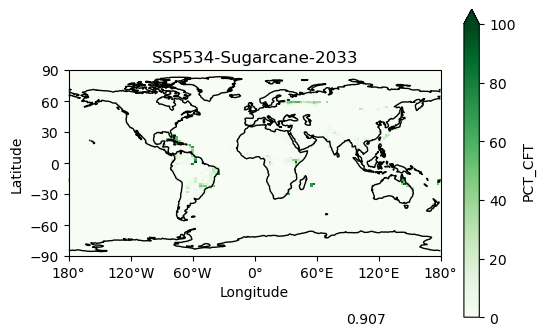

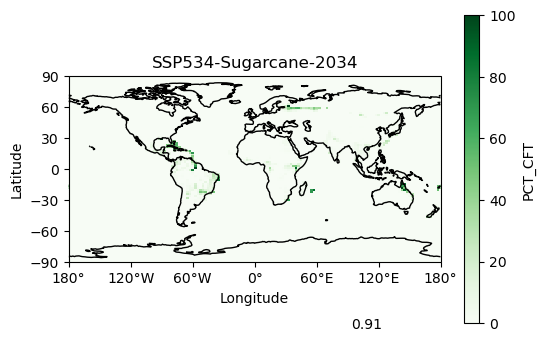

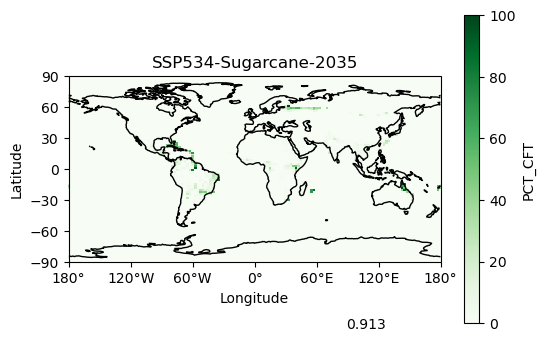

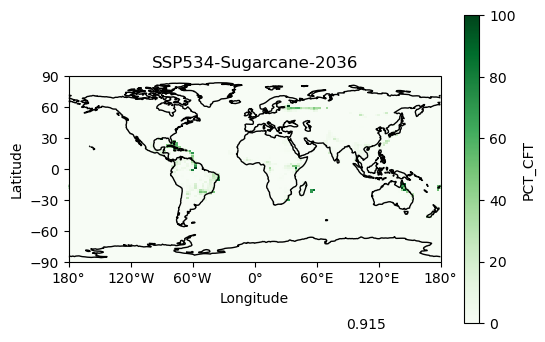

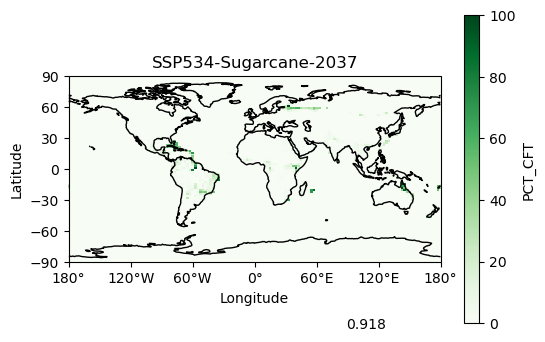

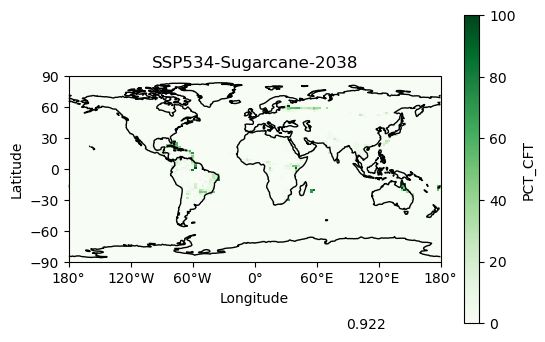

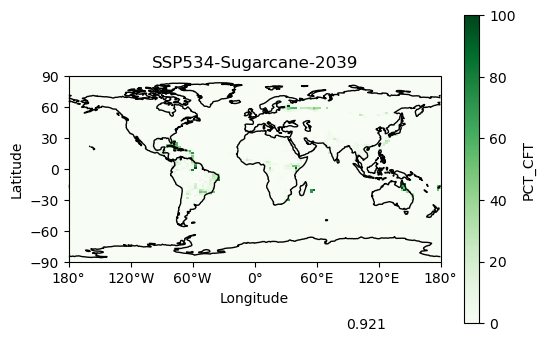

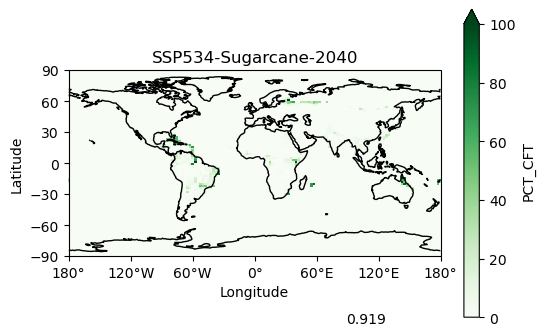

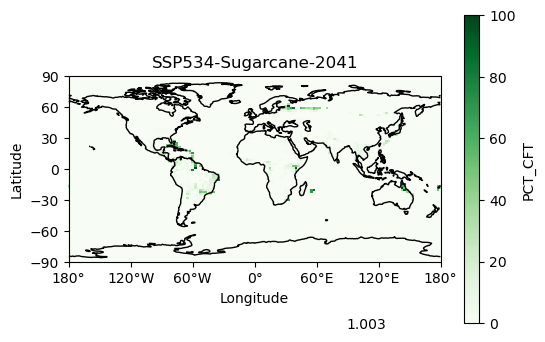

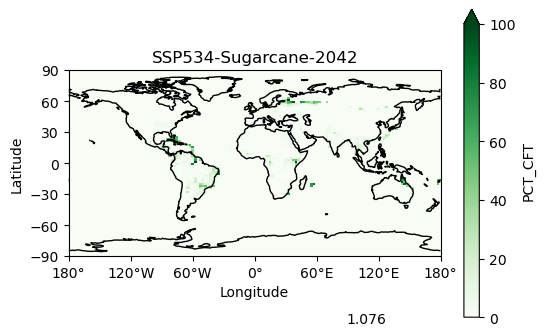

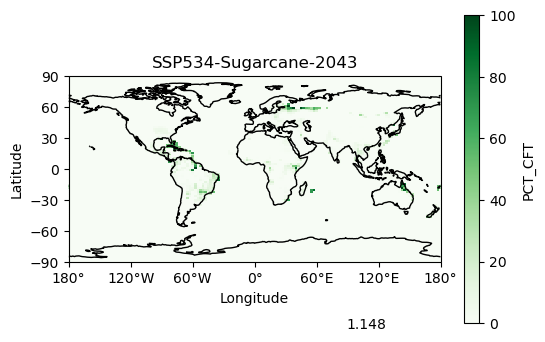

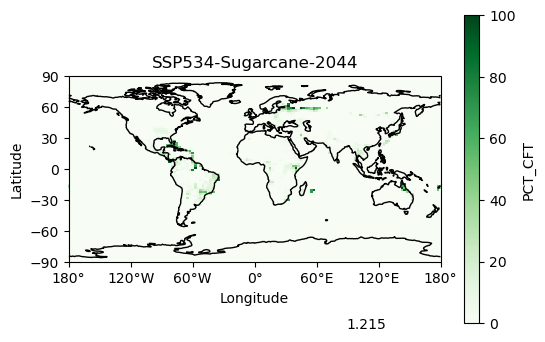

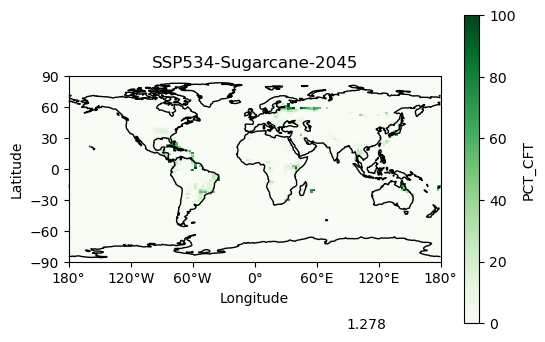

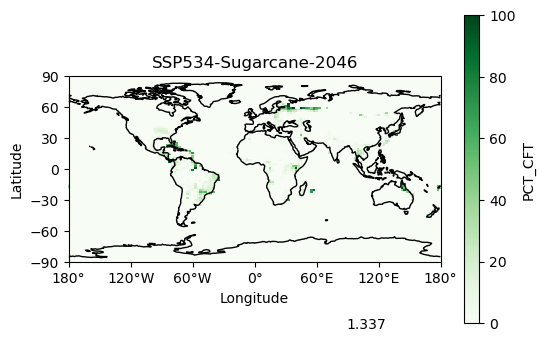

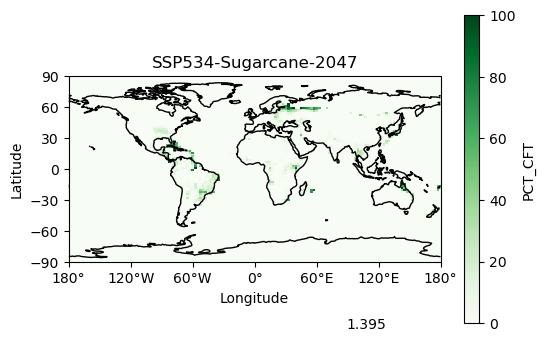

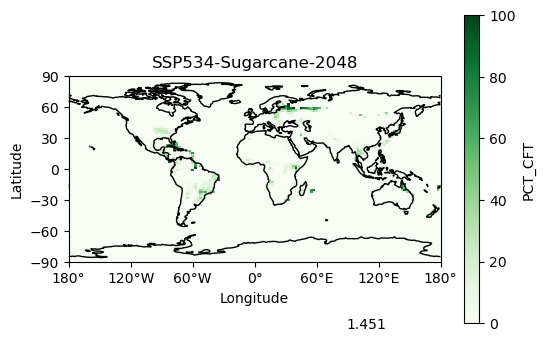

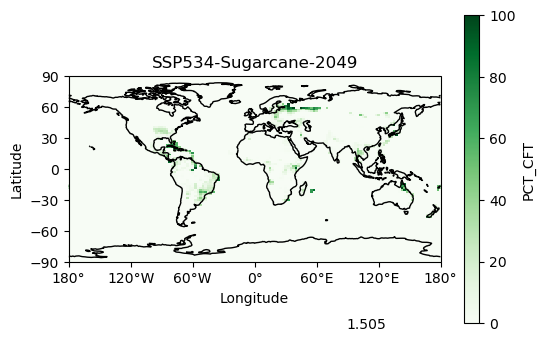

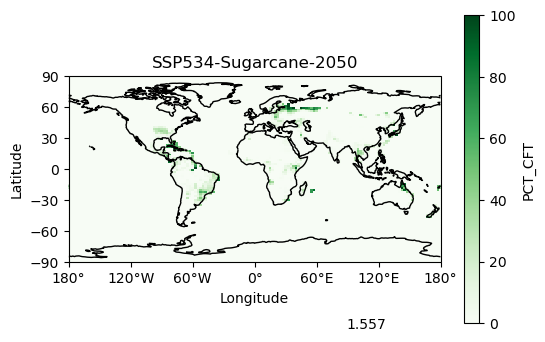

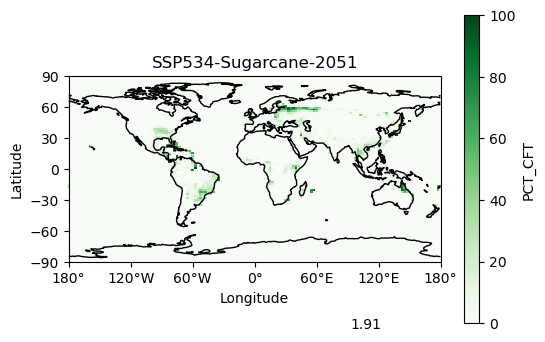

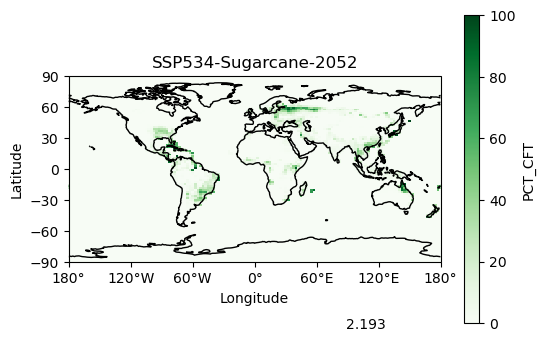

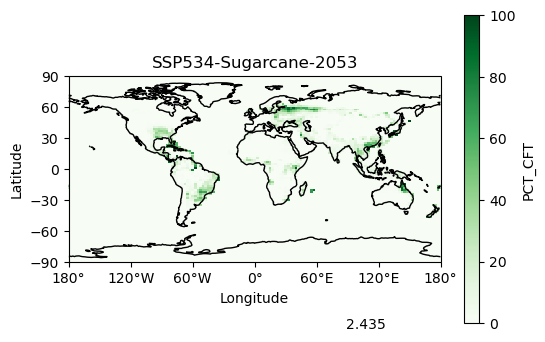

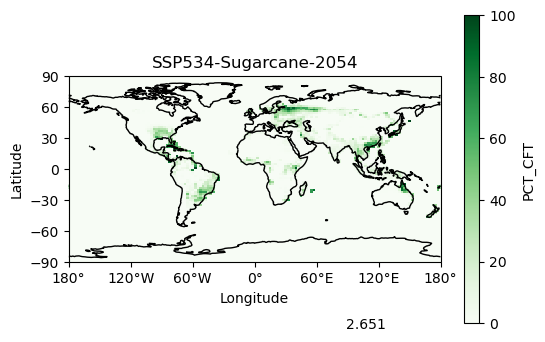

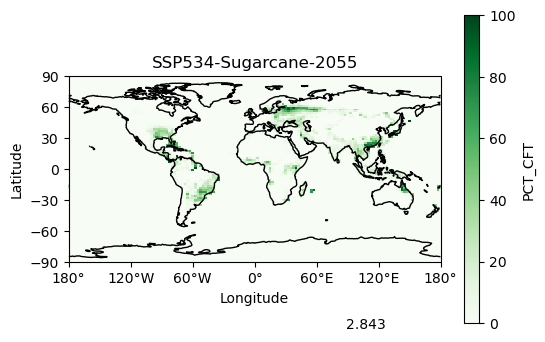

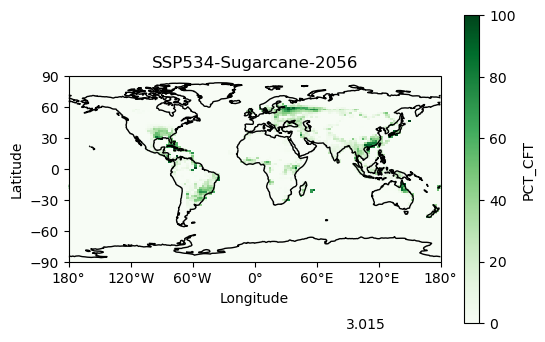

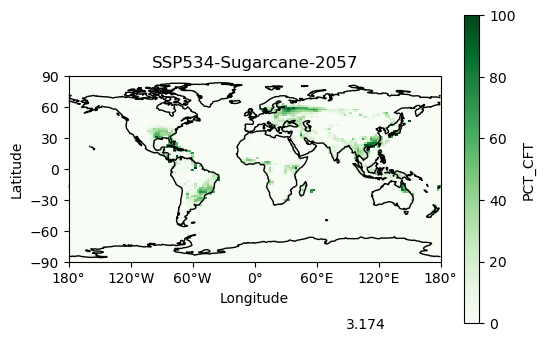

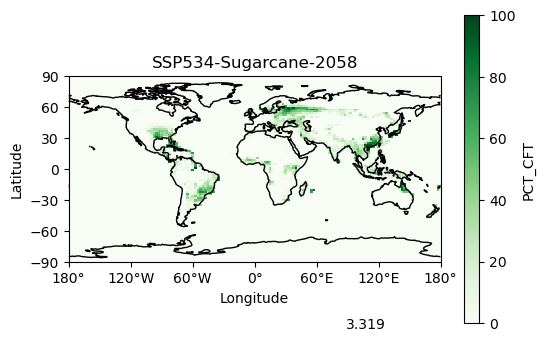

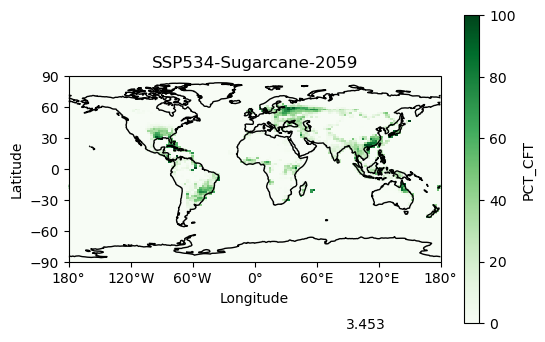

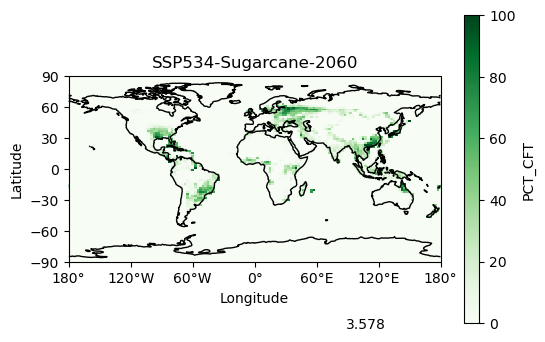

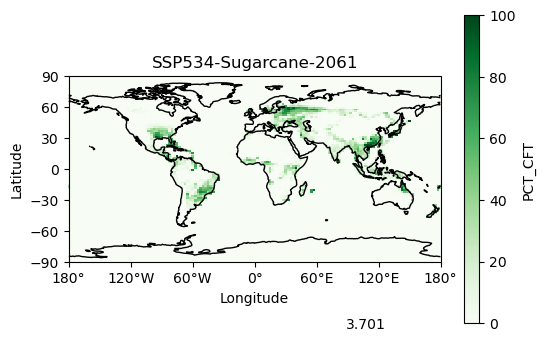

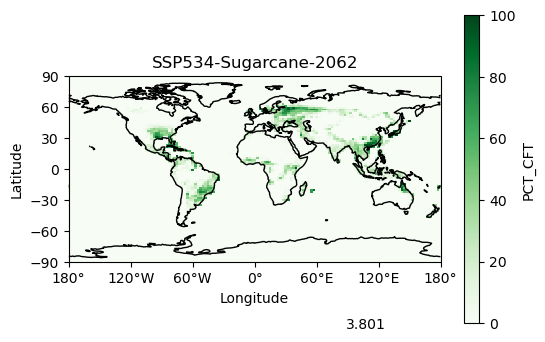

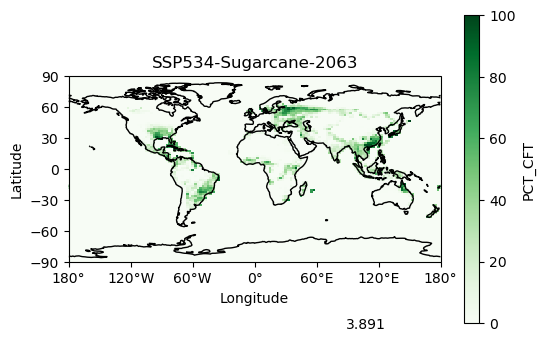

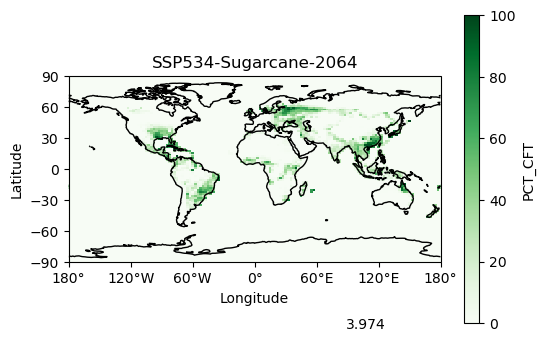

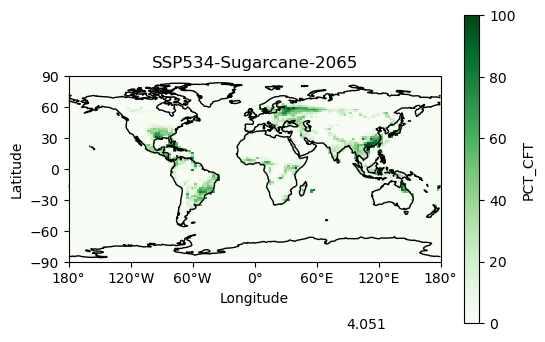

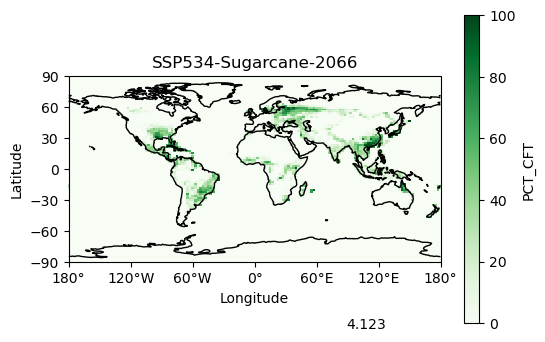

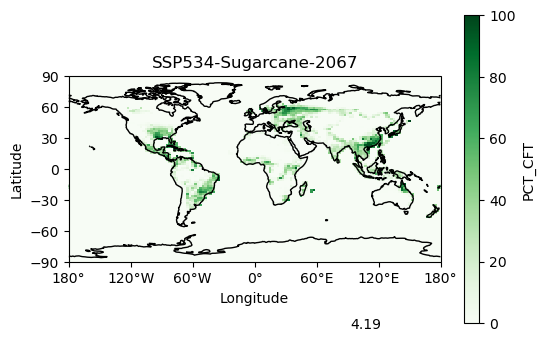

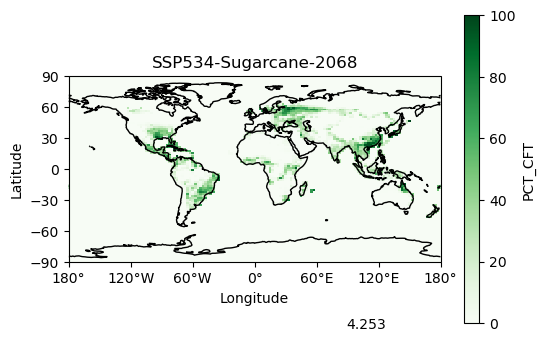

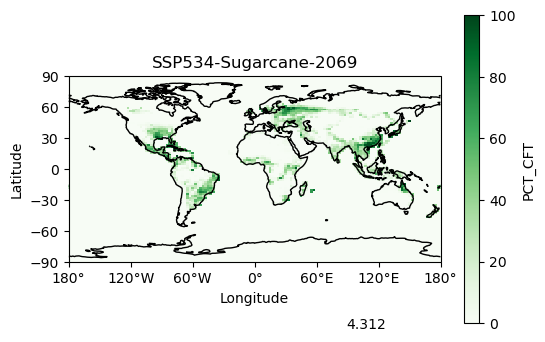

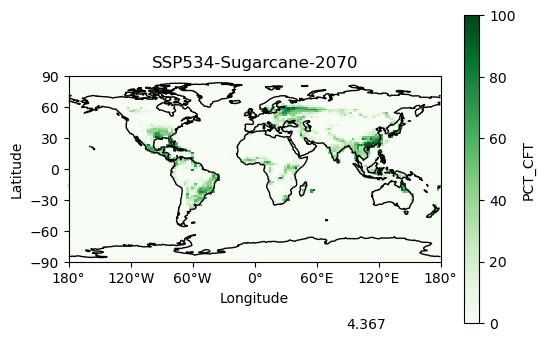

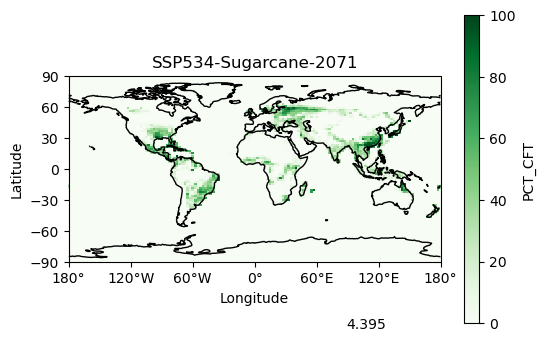

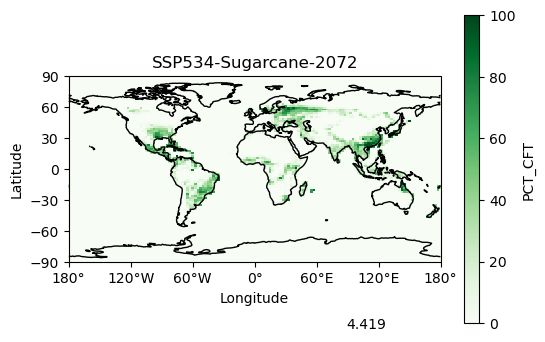

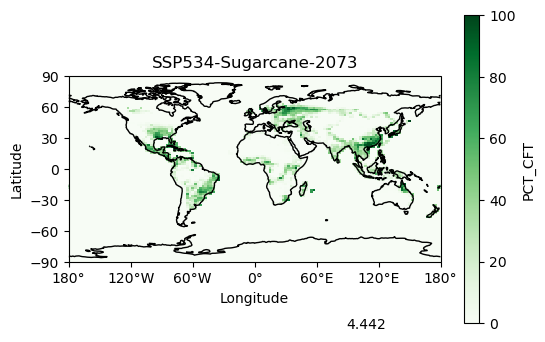

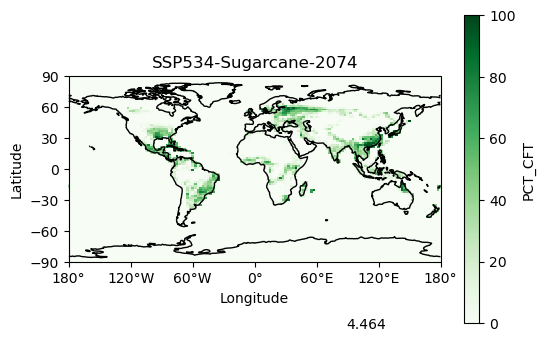

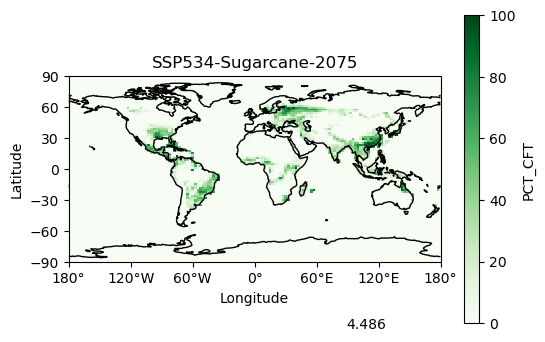

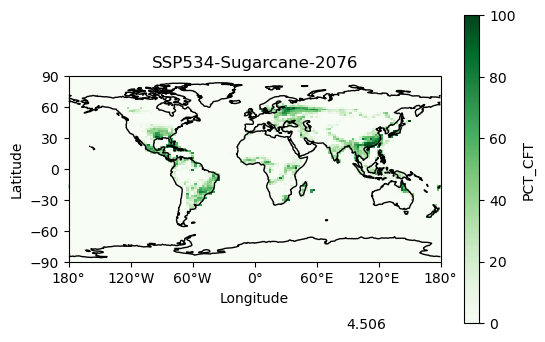

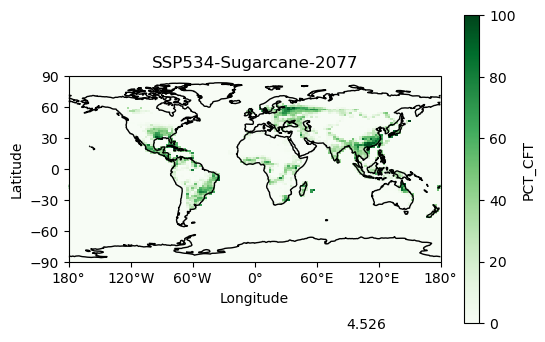

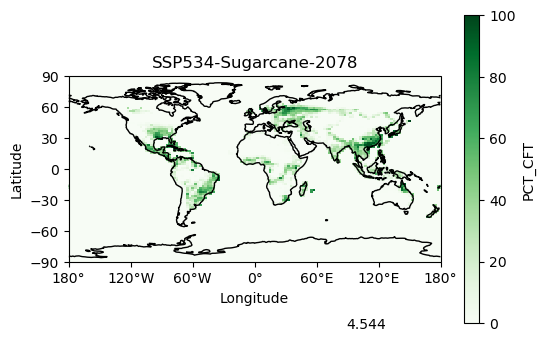

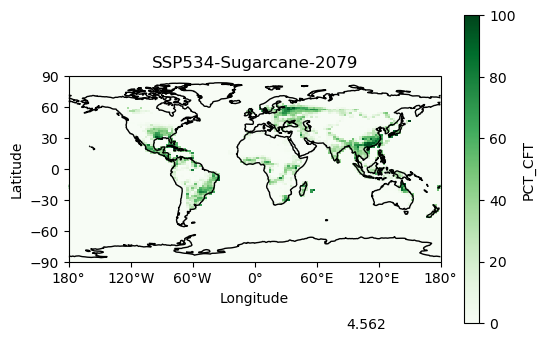

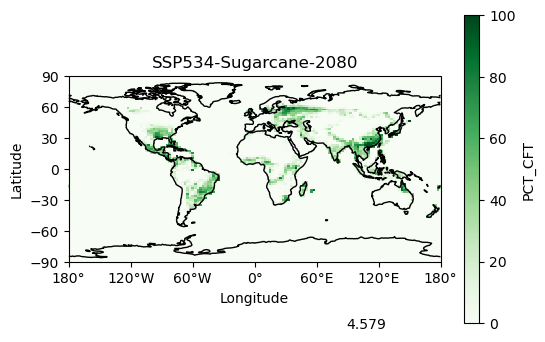

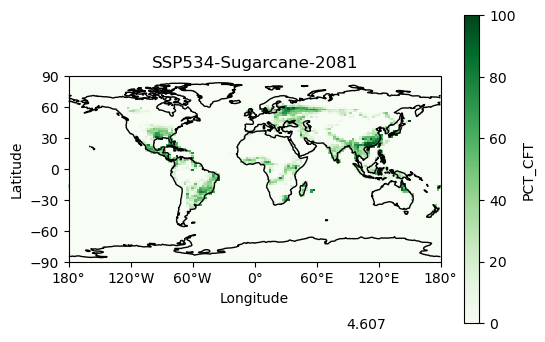

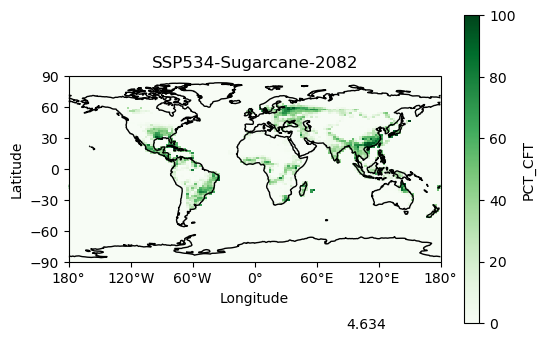

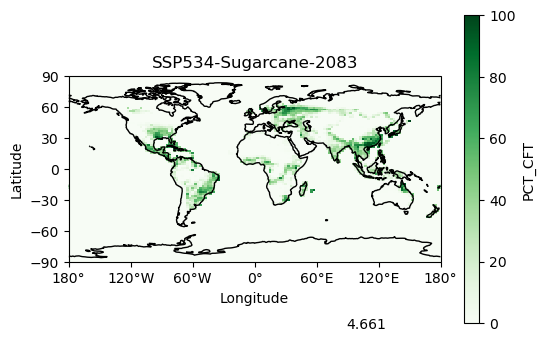

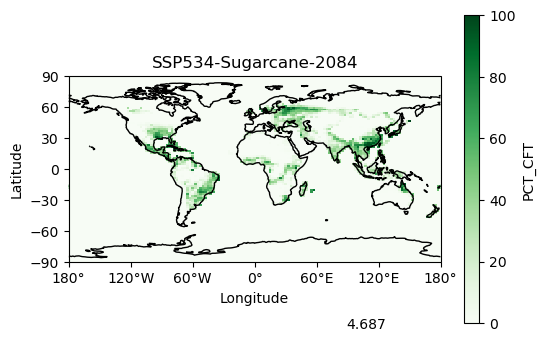

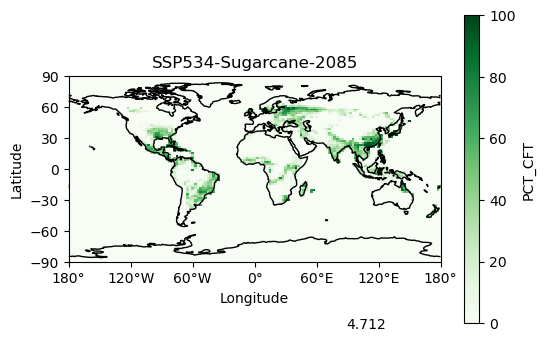

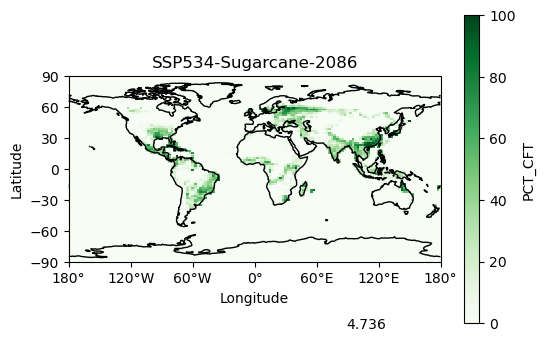

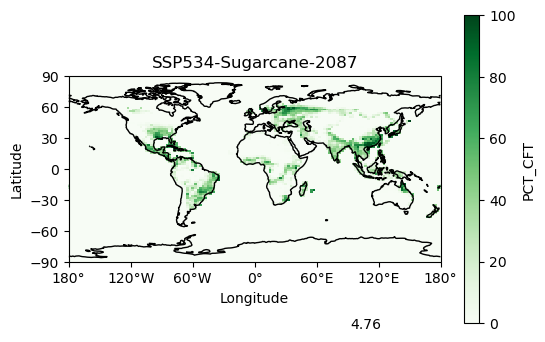

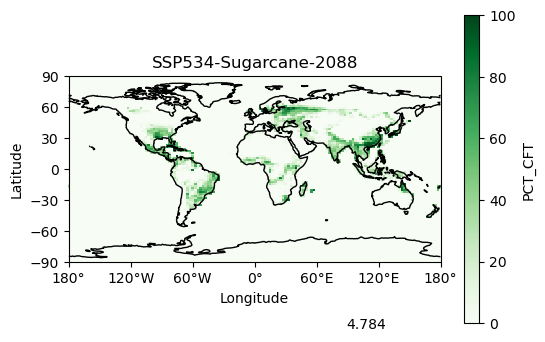

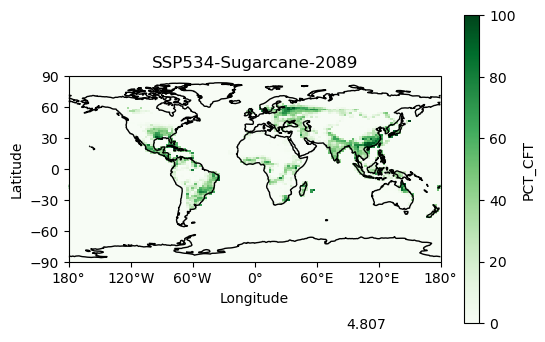

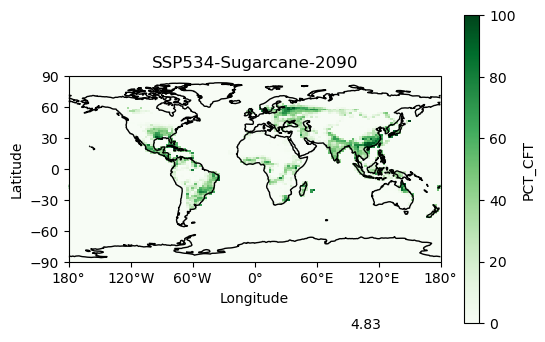

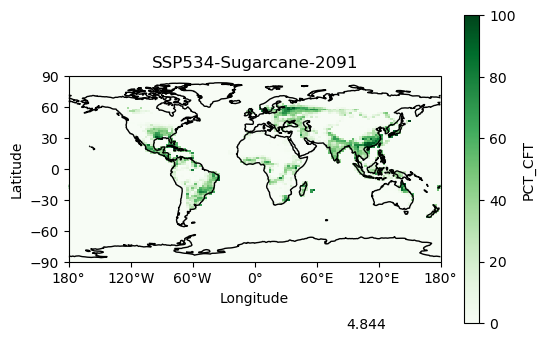

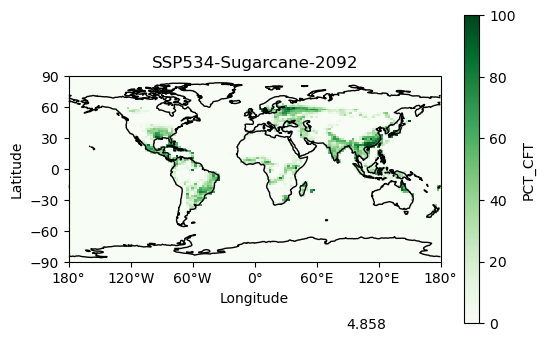

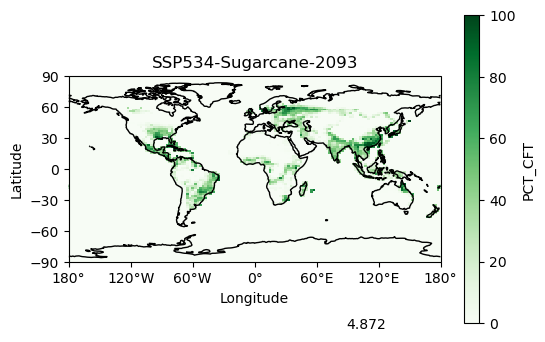

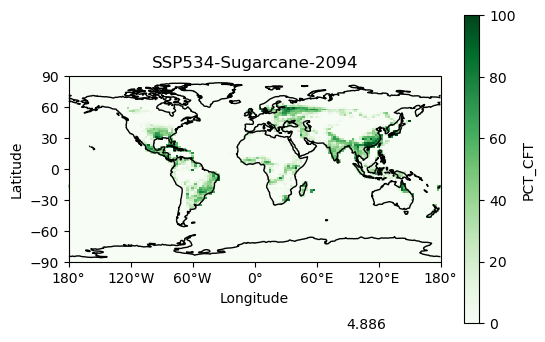

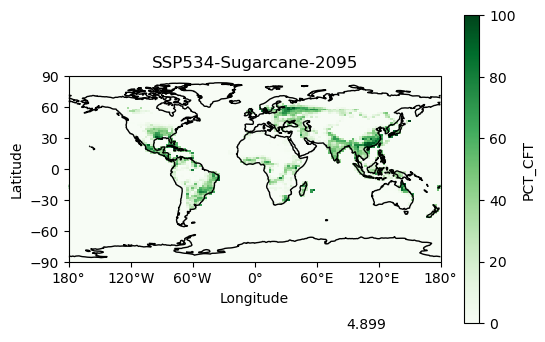

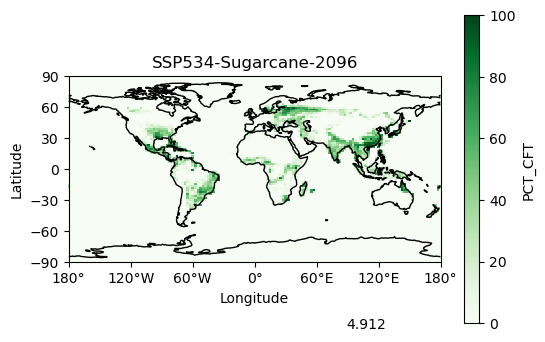

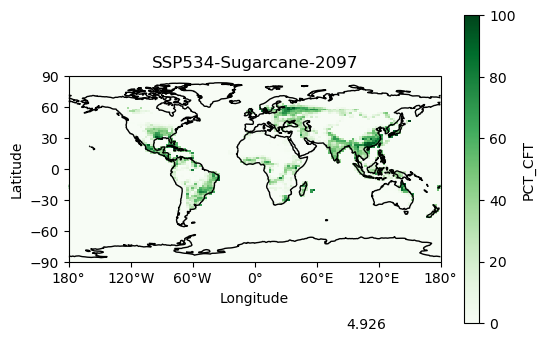

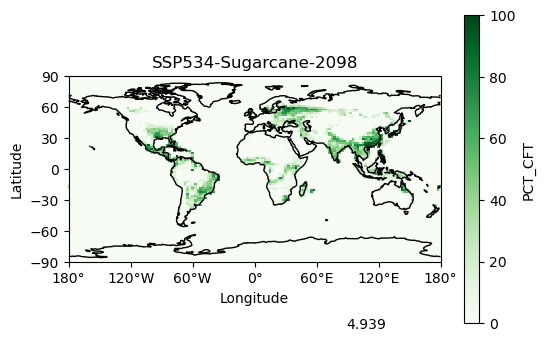

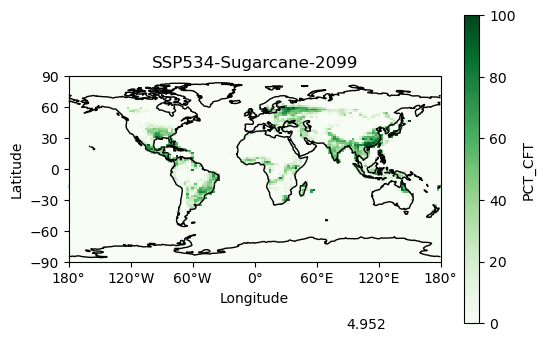

In [4]:
file1  = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'           # file modifies with biocrops
dset = xr.open_dataset(file1, decode_times=False)
dset = dset.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset=dset.assign_coords(Latitude=dset['LATIXY'][:,0].values)
dset=dset.assign_coords(Longitude=dset['LONGXY'][0,:].values)
images = []
for year in range(2015, 2100):
    fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
    PFT_CFT_area = np.multiply((dset['PCT_CFT']/100), dset['AREA']) # converting to area fraction
    #(PFT_CFT_area/1e6).isel(cft=61).sel(time=year).plot(cmap='Greens',vmin=0.02,vmax=0.03) #million km2   # 61 for corn, 77 for soybean and 53 for sugracane
    
    All_corn=dset['PCT_CFT'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft')     #Corn_indices = [2, 3, 60, 61]
    All_Soya=dset['PCT_CFT'].sel(cft=dset.cft[[8, 9, 62, 63]]).sum(dim='cft')     #Soy_indices= [8, 9, 62, 63]
    Sugarcane=dset['PCT_CFT'].sel(cft=dset.cft[[52,53]]).sum(dim='cft')#Sugarcane_indices= [52,53]
    All_corn*=mask
    #Sugarcane*=mask
    #All_corn_tseries= All_corn.sum(['Latitude','Longitude'])

    Sugarcane.sel(time=year).plot(cmap='Greens',vmin=0,vmax=100) #PCT
    axs.coastlines(linewidth=1)
    b=float(np.sum(np.multiply(Sugarcane.sel(time=year),dset['AREA']))/(np.sum(dset['AREA'])))
    #print(b.__round__(3))
    plt.text(0.8, -0.3, b.__round__(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
    axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs.xaxis.set_major_formatter(lon_formatter)
    axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    plt.title(f'SSP534-Sugarcane-{year}')
    plt.savefig(f'/cluster/projects/nn9576k/anusha/plots/SSP534/sugarcane_{year}.png')
    images.append(plt.gcf())
    
    #plt.close()   

#merging them to a GIF

In [7]:
image_files = [f'/cluster/projects/nn9576k/anusha/plots/SSP534/sugarcane_{year}.png' for year in range(2015, 2100)]

# Create a GIF from the image files
with imageio.get_writer('/cluster/projects/nn9576k/anusha/plots/SSP534/sugarcane.gif', mode='I') as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)


In [6]:
#imageio.mimsave('TropicalCorn_SSP534.gif', images, duration=0.5)
images

[<Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2 Axes>,
 <Figure size 600x400 with 2

In [3]:
dset.cft

<xarray.DataArray 'cft' (cft: 64)>
array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78], dtype=int32)
Coordinates:
  * cft      (cft) int32 15 16 17 18 19 20 21 22 23 ... 71 72 73 74 75 76 77 78
Attributes:
    long_name:  indices of CFTs
    units:      index

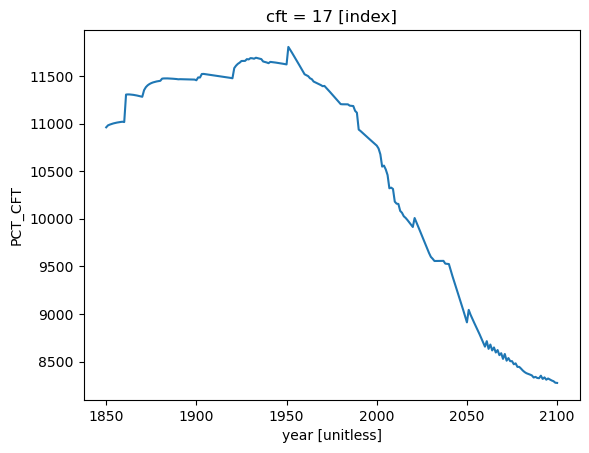

In [5]:

dset['PCT_CFT'].sum(dim=('Latitude', 'Longitude')).loc[dict(cft=17)].sel(time=slice(start_time, end_time)).plot(label='Rainfed Temperate Corn')

In [ ]:
All_corn=dset['PCT_CFT'].sel(cft=dset.cft[[17,18,75,76]]).sum(dim='cft')     #Corn_indices = [17,18,75,76]
All_Soya=dset['PCT_CFT'].sel(cft=dset.cft[[23,24, 77, 78]]).sum(dim='cft')     #Soy_indices= [23,24, 77, 78]
Sugarcane=dset['PCT_CFT'].sel(cft=dset.cft[[67,68]]).sum(dim='cft')#Sugarcane_indices= [67,68]

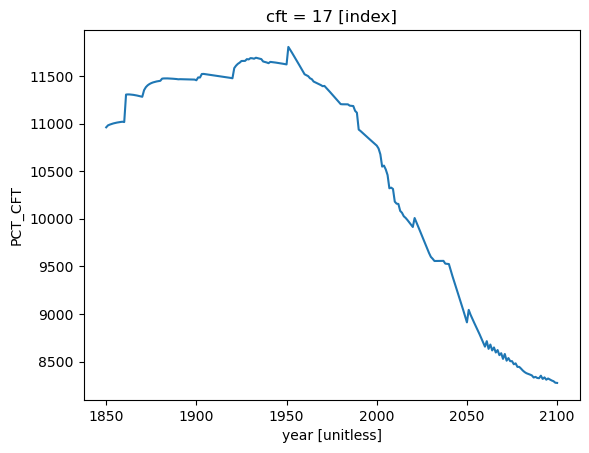

In [6]:
dset['PCT_CFT'].sel(cft=dset.cft[2]).sum(dim=('Latitude', 'Longitude')).plot(label='Rainfed Temperate Corn')